In [47]:
#PART A:

#Step: 1A
#Read the ‘Signals.csv’ as DataFrame and import required libraries. 

#importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

import tqdm
from tqdm import tqdm_notebook

import zipfile
import os
import math

import warnings
warnings.filterwarnings("ignore")
import cv2

signals_df = pd.read_csv("NN Project Data - Signal.csv")

In [2]:
#Step: 1B
#checking for missing values and print percentage for each attribute.

signals_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [3]:
signals_df.shape

(1599, 12)

In [4]:
signals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
signals_df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [6]:
len(signals_df)

1599

In [7]:
attr_per_null = signals_df.isnull().sum() * 100 / len(signals_df)
print(attr_per_null)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [8]:
#Observation: Here, we observe that there are no null values present in any of the attributes/columns in dataset.

In [9]:
#Step: 1C
#Checking for presence of duplicate records in the dataset and impute with appropriate method.

signals_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [10]:
signals_df.duplicated().sum()

240

In [11]:
signals_df.loc[signals_df.duplicated(),:]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [12]:
signals_df.shape

(1599, 12)

In [13]:
#Observation: From the above analysis, we observe that there are 240 duplicate rows present in the dataset.
# We will drop these duplicate rows as the duplicate rows gives the same information as the other in a dataset
# which will not be useful to keep as the duplicate rows are of no use to be kept in the dataset as they
# are providing the same information again.

In [14]:
signals_df.drop_duplicates(inplace=True)

In [15]:
signals_df.duplicated().sum()

0

In [16]:
signals_df.shape

(1359, 12)

In [17]:
#Observation: Here, we can see that there are no duplicates present after dropping the duplicates from the original
# dataframe. The total rows shown by the shape function shows total 1359 rows present after removing 240 duplicate rows.
#Total columns present are 12 in numbers.

In [18]:
#resetting the index after removing the duplicated rows from the dataset.
signals_df.reset_index(inplace=True)

In [19]:
signals_df.head()

,index,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [20]:
signals_df.tail()

,index,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1354,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1358,1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


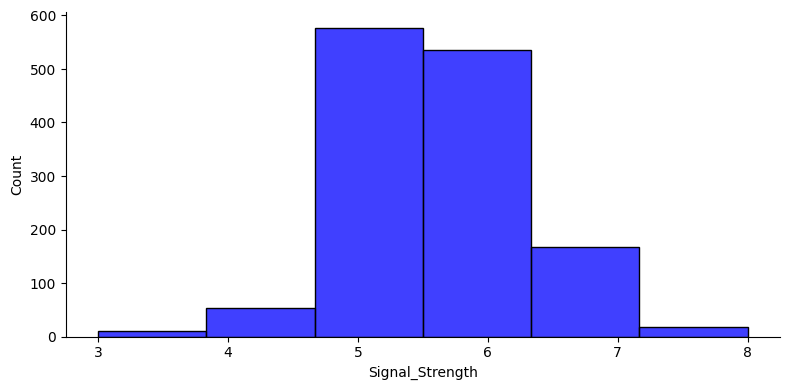

In [21]:
#Step: 1D
#Visualise distribution of the target variable.


sns.displot(signals_df['Signal_Strength'],color='blue', kde=False, bins=6, height=4, aspect=2)

In [22]:
#Step: 1E
#Sharing insights from the initial data analysis.

#Observation: dropping the column index from the dataset.

signals_df.drop(['index'], axis=1, inplace=True)

In [23]:
signals_df.shape

(1359, 12)

In [24]:
signals_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [25]:
signals_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

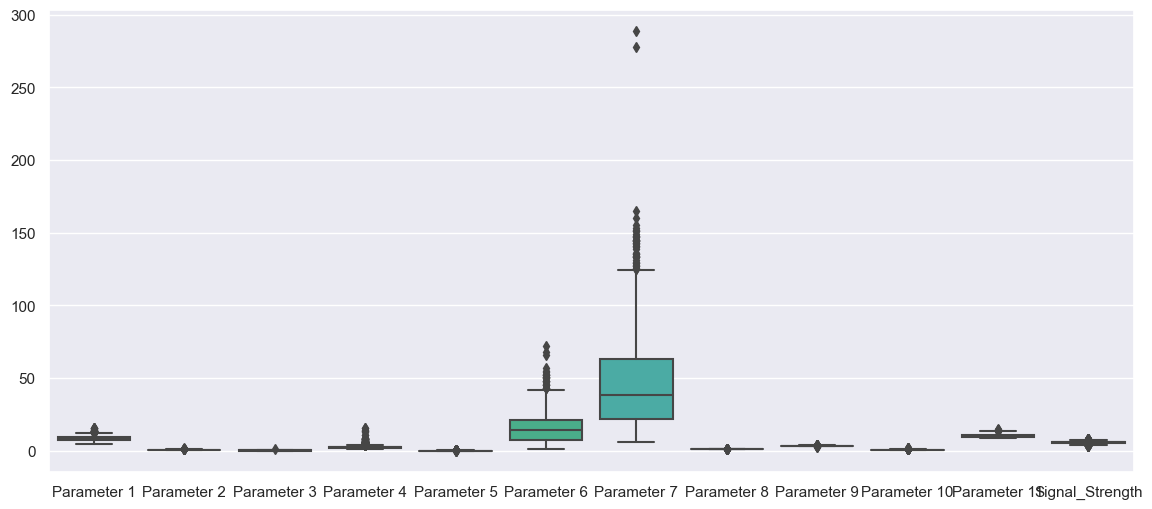

In [26]:
sns.set(rc={"figure.figsize":(14,6)})
sns.boxplot(signals_df)

In [27]:
#Observation 1: There are no null values present in any of the attributes of the given dataset.
#Observation 2: The target variable "Signal_Strength" is of int64 datatype, whereas the rest are of float64 datatype.
#Observation 3: The total duplicate rows present in the dataset were 240 and now been removed already.
#Observation 4: Total columns present are 12 in the given dataset.
#Observation 5: The signal strength of the value 5 are high in total count in the dataset.
#Observation 6: From the above describe function, we observe that the attribute "Parameter 6"
#               has the mininum value of 1 whereas maximum value of 72.
#               This attribute has the 75% of the values lies between 1 and 21 and therefore we can say it has outliers.
#Observation 7: We can observe from the above boxplot that there are outliers in attributes "Parameter 6" & "Parameter 7".

In [48]:
#Step: 2A
#Split the data into X & Y.

#importing necessary libraries.

import tensorflow
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


In [29]:
#checking the tensorflow version:

tensorflow.__version__

'2.10.0'

In [30]:
X_data = signals_df.iloc[:,:-1]

In [31]:
y_data = signals_df.iloc[:,-1]

In [32]:
X_data.shape

(1359, 11)

In [33]:
y_data.shape

(1359,)

In [34]:
X_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [35]:
y_data.head()

0    5
1    5
2    5
3    6
4    5
Name: Signal_Strength, dtype: int64

In [36]:
#Step: 2B
#Spliting the data into train & test with 70:30 proportion.

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [37]:
#Step: 2C
#printing shape of all the 4 variables and verify if train and test data is in sync.

print("Shape of X_train set: ", X_train.shape)
print("Shape of X_test set: ", X_test.shape)
print("Shape of y_train set: ", y_train.shape)
print("Shape of y_test set: ", y_test.shape)

Shape of X_train set:  (951, 11)
Shape of X_test set:  (408, 11)
Shape of y_train set:  (951,)
Shape of y_test set:  (408,)


In [38]:
#Observation: from the above, we verify that train and test data is splitted in the ratio of 70:30 as
# total records present are 1359 out of which 70% of 1359 is 951 which is train set and 30% is 408 which is test set.

In [39]:
#Step: 2D
# Normalising the train and test data with appropriate method.

X_train

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1000,7.1,0.59,0.00,2.2,0.078,26.0,44.0,0.99522,3.42,0.68,10.8
864,10.5,0.39,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4
1170,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8
16,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0
856,9.1,0.30,0.34,2.0,0.064,12.0,25.0,0.99516,3.26,0.84,11.7
...,...,...,...,...,...,...,...,...,...,...,...
763,6.8,0.57,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2
835,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
1216,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
559,7.3,0.67,0.05,3.6,0.107,6.0,20.0,0.99720,3.40,0.63,10.1


In [40]:
X_train = preprocessing.normalize(X_train)

In [41]:
#Step: 2E
#transformming Labels into format acceptable by Neural Network.
y_train_ML = y_train.astype('float32')
y_test_ML = y_test.astype('float32')

In [42]:
y_train_ML = np.array(y_train_ML)
y_test = np.array(y_test_ML)

In [43]:
X_train

array([[1.34239885e-01, 1.11551454e-02, 0.00000000e+00, ...,
        6.46620292e-02, 1.28567777e-02, 2.04195882e-01],
       [3.05475244e-01, 1.13462233e-02, 1.33827250e-02, ...,
        8.90242138e-02, 2.44380195e-02, 3.31658836e-01],
       [1.91201745e-01, 1.45313327e-02, 5.09871321e-04, ...,
        8.56583819e-02, 1.58060110e-02, 2.75330513e-01],
       ...,
       [9.12886029e-02, 4.83292604e-03, 3.31144932e-03, ...,
        2.84605644e-02, 6.89139453e-03, 8.05487673e-02],
       [2.93726510e-01, 2.69584605e-02, 2.01182541e-03, ...,
        1.36804128e-01, 2.53490001e-02, 4.06388733e-01],
       [7.92685532e-02, 6.81039682e-03, 2.23291699e-04, ...,
        3.88527557e-02, 6.69875097e-03, 1.08296474e-01]])

In [44]:
X_test = preprocessing.normalize(X_test)

In [45]:
X_test

array([[0.2835907 , 0.01890605, 0.00275713, ..., 0.1327362 , 0.02678357,
        0.4411411 ],
       [0.08545468, 0.00550708, 0.00237374, ..., 0.03066874, 0.00541213,
        0.09210116],
       [0.10678326, 0.00505815, 0.00435563, ..., 0.04861449, 0.00871127,
        0.13347908],
       ...,
       [0.32783549, 0.01243514, 0.01431925, ..., 0.12435139, 0.02750804,
        0.45218688],
       [0.12658088, 0.01122652, 0.00165761, ..., 0.0480706 , 0.01235671,
        0.14466387],
       [0.22346013, 0.01256963, 0.00642448, ..., 0.08966338, 0.01368693,
        0.28491166]])

In [46]:
X_test.dtype

dtype('float64')

In [47]:
X_train

array([[1.34239885e-01, 1.11551454e-02, 0.00000000e+00, ...,
        6.46620292e-02, 1.28567777e-02, 2.04195882e-01],
       [3.05475244e-01, 1.13462233e-02, 1.33827250e-02, ...,
        8.90242138e-02, 2.44380195e-02, 3.31658836e-01],
       [1.91201745e-01, 1.45313327e-02, 5.09871321e-04, ...,
        8.56583819e-02, 1.58060110e-02, 2.75330513e-01],
       ...,
       [9.12886029e-02, 4.83292604e-03, 3.31144932e-03, ...,
        2.84605644e-02, 6.89139453e-03, 8.05487673e-02],
       [2.93726510e-01, 2.69584605e-02, 2.01182541e-03, ...,
        1.36804128e-01, 2.53490001e-02, 4.06388733e-01],
       [7.92685532e-02, 6.81039682e-03, 2.23291699e-04, ...,
        3.88527557e-02, 6.69875097e-03, 1.08296474e-01]])

In [48]:
y_train_ML

array([6., 6., 6., 4., 7., 5., 5., 6., 5., 6., 6., 5., 5., 5., 6., 6., 5.,
       5., 5., 6., 5., 6., 7., 5., 5., 5., 5., 6., 5., 6., 5., 7., 7., 5.,
       5., 8., 5., 5., 5., 5., 7., 5., 5., 5., 6., 7., 6., 5., 5., 6., 5.,
       5., 6., 6., 6., 7., 6., 5., 5., 5., 5., 6., 6., 7., 5., 5., 6., 5.,
       6., 6., 7., 7., 6., 5., 5., 7., 4., 6., 4., 6., 7., 5., 7., 5., 5.,
       6., 6., 5., 5., 5., 6., 5., 5., 6., 5., 5., 5., 6., 5., 5., 6., 5.,
       5., 7., 7., 6., 4., 6., 6., 5., 6., 5., 6., 5., 6., 6., 7., 5., 5.,
       5., 6., 6., 6., 7., 6., 5., 5., 6., 6., 6., 5., 7., 6., 6., 6., 6.,
       5., 5., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5., 6., 6., 6., 7.,
       7., 5., 6., 5., 6., 6., 5., 5., 5., 5., 6., 5., 5., 6., 7., 5., 5.,
       5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 6., 5., 7., 5., 7.,
       6., 5., 5., 5., 4., 4., 5., 6., 7., 5., 5., 4., 5., 7., 5., 6., 4.,
       5., 6., 7., 6., 5., 6., 5., 5., 6., 5., 8., 6., 6., 4., 5., 6., 6.,
       5., 6., 4., 6., 6.

In [49]:
y_train_NN = pd.get_dummies(y_train_ML)
y_test_NN = pd.get_dummies(y_test_ML)

In [50]:
y_test_NN

,3.0,4.0,5.0,6.0,7.0,8.0
965,False,False,False,False,True,False
657,False,False,True,False,False,False
1002,False,False,False,True,False,False
918,False,False,False,False,True,False
798,False,False,False,True,False,False
...,...,...,...,...,...,...
1253,True,False,False,False,False,False
759,False,False,False,True,False,False
794,False,False,False,False,True,False
122,False,False,True,False,False,False


In [51]:
y_train_NN


,3.0,4.0,5.0,6.0,7.0,8.0
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,True,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
946,False,False,False,True,False,False
947,False,False,True,False,False,False
948,False,False,False,True,False,False
949,False,False,True,False,False,False


In [52]:
#Step: 3A
# designing a Neural Network to train a classifier.

#importing necessary libraries for designing Neural Network architecture.

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

model = Sequential()

model.add(Dense(64, input_shape = (11,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,414
Trainable params: 1,286
Non-trainable params: 128
_________________________________________________________________


In [53]:
#Step: 3B
#training the classifier using previously designed Architecture.

opt = optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,414
Trainable params: 1,286
Non-trainable params: 128
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train_NN, batch_size = 30, epochs = 30,validation_data=(X_test, y_test_NN))

Epoch 1/30
32/32 [==============================] - 1s 8ms/step - loss: 1.9534 - accuracy: 0.2187 - val_loss: 1.6609 - val_accuracy: 0.3750
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 1.6816 - accuracy: 0.3817 - val_loss: 1.5427 - val_accuracy: 0.3750
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 1.5367 - accuracy: 0.4553 - val_loss: 1.4168 - val_accuracy: 0.3750
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 1.3881 - accuracy: 0.4732 - val_loss: 1.3247 - val_accuracy: 0.3750
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 1.3017 - accuracy: 0.4595 - val_loss: 1.2723 - val_accuracy: 0.3750
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 1.2480 - accuracy: 0.4879 - val_loss: 1.2398 - val_accuracy: 0.4191
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 1.2347 - accuracy: 0.4700 - val_loss: 1.2245 - val_accuracy: 0.4191
Epoch 8/30
32/32 [==

Text(0.5, 1.0, 'Training and validation loss')

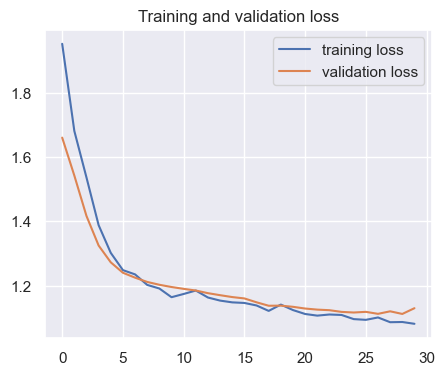

In [55]:
#Step: 3C
#Plot 2 separate visuals.

#plotting Training Loss and Validation Loss.


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.figure(figsize=(5,4))
plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

<Figure size 1400x600 with 0 Axes>

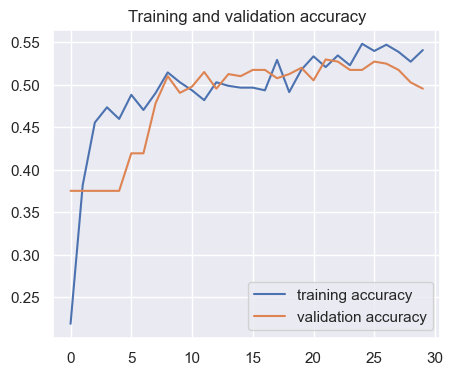

<Figure size 1400x600 with 0 Axes>

In [64]:
#plotting training Accuracy and Validation Accuracy

plt.figure(figsize=(5,4))
plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

In [ ]:
#Observation 1: From the above chart we observe that training accuracy of 54.05% is achieved at last epoch = 30.
# whereas validation accuracy of 49.51% is achieved at the last epcoh = 30. 
#Observation 2: Also, the validation loss is reduced to 1.1294 by using the loss function "categorical_crossentropy".

In [58]:
#Step: 3D
#Designing new architecture/update existing architecture in attempt to improve the performance of the model.

#adding 2 new layers of dense layers with 256 and 128 filters respectively.
#dropout value fixed at 0.1 for the 1st dense layer.

new_model = Sequential()


new_model.add(Dense(256, input_shape = (11,), activation = 'relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.1))

new_model.add(Dense(128, input_shape = (11,), activation = 'relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))

new_model.add(Dense(64, input_shape = (11,), activation = 'relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))

new_model.add(Dense(6, activation = 'softmax'))
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3072      
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [59]:
opt = optimizers.Adam(learning_rate= 0.001)
new_model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])

In [63]:
history_2 = new_model.fit(X_train, y_train_NN, batch_size = 32, epochs = 40,validation_data=(X_test, y_test_NN))

Epoch 1/40
30/30 [==============================] - 0s 5ms/step - loss: 0.9285 - accuracy: 0.6078 - val_loss: 1.0815 - val_accuracy: 0.5809
Epoch 2/40
30/30 [==============================] - 0s 4ms/step - loss: 0.9438 - accuracy: 0.5973 - val_loss: 1.1020 - val_accuracy: 0.5613
Epoch 3/40
30/30 [==============================] - 0s 4ms/step - loss: 0.9140 - accuracy: 0.6183 - val_loss: 1.0688 - val_accuracy: 0.5735
Epoch 4/40
30/30 [==============================] - 0s 4ms/step - loss: 0.9382 - accuracy: 0.5931 - val_loss: 1.1409 - val_accuracy: 0.5613
Epoch 5/40
30/30 [==============================] - 0s 4ms/step - loss: 0.9418 - accuracy: 0.6025 - val_loss: 1.1717 - val_accuracy: 0.5417
Epoch 6/40
30/30 [==============================] - 0s 4ms/step - loss: 0.9527 - accuracy: 0.5857 - val_loss: 1.1246 - val_accuracy: 0.5613
Epoch 7/40
30/30 [==============================] - 0s 4ms/step - loss: 0.9237 - accuracy: 0.5994 - val_loss: 1.1296 - val_accuracy: 0.5564
Epoch 8/40
30/30 [==

In [ ]:
#Observation: The model performance is improved by designing the new Neural Network architecture.
# We have achieved training accuracy of 59.20% whereas validation accuracy is achieved to 55.39% with total epochs = 40.
# The validation loss is reduced to 1.1124% at the final epoch.
# The accuracy of 62.04% is also achieved at epoch = 33 with the new NN architecture.

Text(0.5, 1.0, 'Training and validation loss')

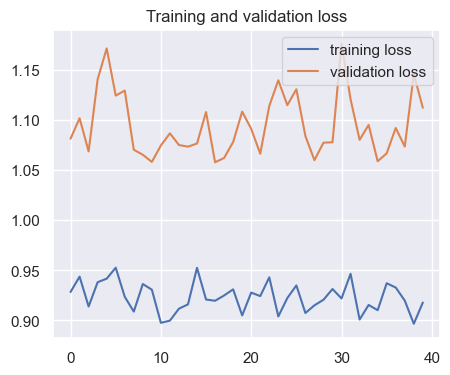

In [66]:
#Step: 3E
#Plot visuals as in Q3.C and share insights about difference observed in both the models

#plotting Training Loss and Validation Loss.


accuracy_2 = history_2.history['accuracy']
val_accuracy_2 = history_2.history['val_accuracy']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs = range(len(accuracy_2)) # Get number of epochs

plt.figure(figsize=(5,4))
plt.plot(epochs, loss_2, label = 'training loss')
plt.plot(epochs, val_loss_2, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

<Figure size 1400x600 with 0 Axes>

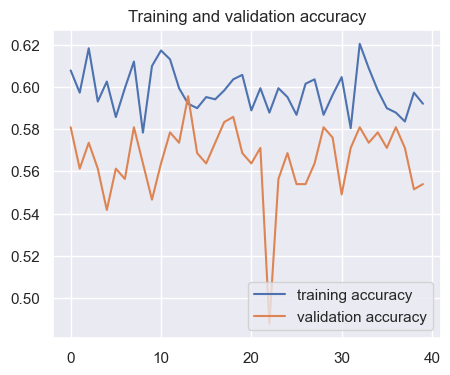

<Figure size 1400x600 with 0 Axes>

In [67]:
#plotting training Accuracy and Validation Accuracy

plt.figure(figsize=(5,4))
plt.plot(epochs, accuracy_2, label = 'training accuracy')
plt.plot(epochs, val_accuracy_2, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

In [78]:
#displaying the final score and accuracy of the 1st model created in Step: 3A

score, acc = model.evaluate(X_test,y_test_NN)
score1, acc1 = model.evaluate(X_train,y_train_NN)

print('Validation Loss:', score,'   Validation accuracy:', acc)


30/30 [==============================] - 0s 1ms/step - loss: 1.0604 - accuracy: 0.5384
Validation Loss: 1.1293535232543945    Validation accuracy: 0.4950980246067047


In [79]:
print('Train Loss:', score1,'   Train accuracy:',acc1)

Train Loss: 1.0603686571121216    Train accuracy: 0.5383806228637695


In [80]:
#displaying the final score and accuracy of the 2nd new NN architecture model created in Step: 3A

score2, acc2 = new_model.evaluate(X_test,y_test_NN)
score3, acc3 = new_model.evaluate(X_train,y_train_NN)

print('Validation Loss:', score2,'   Validation accuracy:', acc2)

30/30 [==============================] - 0s 1ms/step - loss: 0.8829 - accuracy: 0.5889
Validation Loss: 1.112404227256775    Validation accuracy: 0.5539215803146362


In [81]:
print('Train Loss:', score3,'   Train accuracy:',acc3)

Train Loss: 0.8828730583190918    Train accuracy: 0.5888538360595703


In [91]:
print("Validation accuracy is achieved from 1st model designed is:", acc*100,"%")
print("Validation accuracy is achieved from 2nd new model designed is:", acc2*100, "%")

Validation accuracy is achieved from 1st model designed is: 49.50980246067047 %
Validation accuracy is achieved from 2nd new model designed is: 55.39215803146362 %


In [92]:
print("Difference between the accuracies perecentage achieved between new model & previous model is:", (acc2-acc)*100,"%")

Difference between the accuracies perecentage achieved between new model & previous model is: 5.882355570793152 %


In [93]:
#Observation: Here, from the above accuracies comparison we can clearly say that the new NN model has
# given better accuracy than previous NN model. The difference between the accuracies achieved is 5.8823%

In [ ]:
#**********************************************************************************************************************
#**********************************************************************************************************************

In [99]:
#PART B:

#Step: 1A
#Reading the .h5 file and assign to a variable.

#importing the necessary library.

import h5py

h5py.run_tests()

hf = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [100]:
#Step: 1B
#Print all the keys from the .h5 file.

hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [101]:
#Step: 1C
#Split the data into X_train, X_test, Y_train, Y_test.

X_test = hf.get('X_test')
X_train = hf.get('X_train')
X_val = hf.get('X_val')
y_test = hf.get('y_test')
y_train = hf.get('y_train')
y_val = hf.get('y_val')

In [102]:
#Step: 2A
#Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

print("shape of X_train is: ", X_train.shape)
print("shape of X_test is: ", X_test.shape)
print("shape of y_train is: ", y_train.shape)
print("shape of y_test is: ", y_test.shape)

shape of X_train is:  (42000, 32, 32)
shape of X_test is:  (18000, 32, 32)
shape of y_train is:  (42000,)
shape of y_test is:  (18000,)


In [103]:
print("shape of X_val is: ", X_val.shape)
print("shape of y_val is: ", y_val.shape)

shape of X_val is:  (60000, 32, 32)
shape of y_val is:  (60000,)


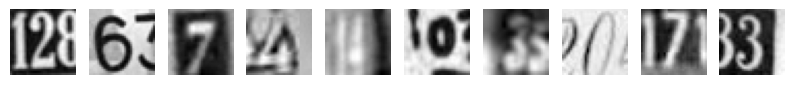

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [104]:
#Step: 2B
#Visualise first 10 images in train data and print its corresponding labels.

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [105]:
pd.unique(y_train)

array([2, 6, 7, 4, 0, 3, 1, 8, 5, 9], dtype=uint8)

In [106]:
X_train.dtype

dtype('<f4')

In [107]:
X_train.shape

(42000, 32, 32)

In [108]:
X_test.dtype

dtype('<f4')

In [109]:
X_test.shape

(18000, 32, 32)

In [110]:
y_train.dtype

dtype('uint8')

In [111]:
y_train.shape

(42000,)

In [23]:
y_test.dtype

dtype('uint8')

In [112]:
y_test.shape

(18000,)

In [119]:
#Step: 2C
#Reshape all the images with appropriate shape update the data in same variable.

#importing necessary libraries.

import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

# Flatten the images
image_vector_size = 32*32

X_train = np.array([np.array(val) for val in X_train])
X_train = X_train.reshape(X_train.shape[0], image_vector_size)

X_test = np.array([np.array(val) for val in X_test])
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

#Step: 2D
#Normalise the images i.e. Normalise the pixel values.

# # normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [120]:
X_train[1]

array([0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
       0.31092745], dtype=float32)

In [134]:
y_train = y_train.astype('float32')

In [136]:
y_test = y_test.astype('float32')

In [137]:
X_test[1]

array([0.45161137, 0.44769022, 0.44376904, ..., 0.1652502 , 0.18922432,
       0.20883021], dtype=float32)

In [138]:
y_test[1]

7.0

In [139]:
X_test.dtype

dtype('float32')

In [140]:
y_test.dtype

dtype('float32')

In [141]:
y_train.dtype

dtype('float32')

In [142]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [143]:
y_train.shape

(42000,)

In [144]:
y_train.dtype

dtype('float32')

In [145]:
y_test.dtype

dtype('float32')

In [146]:
y_train[1]

6.0

In [147]:
y_test[1]

7.0

In [148]:
y_train

array([2., 6., 7., ..., 7., 0., 4.], dtype=float32)

In [149]:
y_test

array([1., 7., 2., ..., 7., 9., 2.], dtype=float32)

In [150]:
#Step: 2E
#Transform Labels into format acceptable by Neural Network.

y_train_N = pd.get_dummies(y_train)
y_test_N = pd.get_dummies(y_test)

In [151]:
y_train_N

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,True,False,False
41996,False,False,False,False,False,True,False,False,False,False
41997,False,False,False,False,False,False,False,True,False,False
41998,True,False,False,False,False,False,False,False,False,False


In [152]:
y_test_N

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17995,False,False,False,False,False,False,False,False,False,True
17996,False,True,False,False,False,False,False,False,False,False
17997,False,False,False,False,False,False,False,True,False,False
17998,False,False,False,False,False,False,False,False,False,True


In [153]:
X_train.shape

(42000, 1024)

In [155]:
y_train_N.shape

(42000, 10)

In [156]:
X_test.shape

(18000, 1024)

In [157]:
y_test_N.shape

(18000, 10)

In [158]:
#Step: 2F
#Print total Number of classes in the Dataset.

total_classes = hf.get('y_train')
print("Diffeent Classes present in the dataset are: ", pd.unique(total_classes))

n = len(pd.unique(total_classes))
print("total number of classes in the dataset are: ", n)

Diffeent Classes present in the dataset are:  [2 6 7 4 0 3 1 8 5 9]
total number of classes in the dataset are:  10


In [83]:
#checking the datatype of the datasets.
X_train.dtype

dtype('float32')

In [84]:
X_test.dtype

dtype('float32')

In [85]:
X_train.shape

(42000, 32, 32, 1)

In [93]:
y_train_N.shape

(42000, 10)

In [173]:
#PART: 3A
#Design a Neural Network to train a classifier

# define model
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras.preprocessing import image


from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# create model
model = Sequential()  

model.add(Dense(256, activation='relu',input_shape=(X_train[0].shape)))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [174]:
#PART: 3B
#Train the classifier using previously designed Architecture

# Compile model
#RMS_prop=optimizers.RMSprop()
#adam = optimizers.Adam(lr=1e-3)

opt = optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])

In [175]:
## Looking into our base model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               262400    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                      

In [176]:
history_4 = model.fit(X_train, y_train_N, batch_size = 16, epochs = 20, validation_data=(X_test, y_test_N))

Epoch 1/20
2625/2625 [==============================] - 9s 3ms/step - loss: 2.0183 - accuracy: 0.2532 - val_loss: 2.8000 - val_accuracy: 0.1632
Epoch 2/20
2625/2625 [==============================] - 8s 3ms/step - loss: 1.6110 - accuracy: 0.4346 - val_loss: 1.4959 - val_accuracy: 0.4806
Epoch 3/20
2625/2625 [==============================] - 8s 3ms/step - loss: 1.4315 - accuracy: 0.5220 - val_loss: 1.9431 - val_accuracy: 0.3642
Epoch 4/20
2625/2625 [==============================] - 8s 3ms/step - loss: 1.3319 - accuracy: 0.5657 - val_loss: 1.5954 - val_accuracy: 0.4663
Epoch 5/20
2625/2625 [==============================] - 8s 3ms/step - loss: 1.2812 - accuracy: 0.5873 - val_loss: 1.3117 - val_accuracy: 0.5792
Epoch 6/20
2625/2625 [==============================] - 8s 3ms/step - loss: 1.2429 - accuracy: 0.6000 - val_loss: 1.2785 - val_accuracy: 0.5785
Epoch 7/20
2625/2625 [==============================] - 9s 3ms/step - loss: 1.2216 - accuracy: 0.6100 - val_loss: 1.1116 - val_accuracy:

In [179]:
#Step: 3C
#Evaluate performance of the model with appropriate metrics.

score, acc = model.evaluate(X_test,y_test_N)

print('Validation Loss:', score,'   Validation accuracy:', acc)

563/563 [==============================] - 1s 2ms/step - loss: 0.8816 - accuracy: 0.7230
Validation Loss: 0.8815762400627136    Validation accuracy: 0.7229999899864197


In [ ]:
#Observation: The validation accuracy achieved is 72.29% with total epochs = 20 & batch size = 16.
# whereas the validation loss reduced to 0.88%.

In [178]:
score1, acc1 = model.evaluate(X_train,y_train_N)

print('Train Loss:', score1,'   Train accuracy:',acc1)

1313/1313 [==============================] - 2s 2ms/step - loss: 0.8411 - accuracy: 0.7298
Train Loss: 0.8411014676094055    Train accuracy: 0.7297857403755188


In [ ]:
#Observation: The training accuracy achieved is 72.97% with total epochs = 20 & batch size = 16.
#whereas the training loss reduced to 0.84%.

Text(0.5, 1.0, 'Training and validation loss')

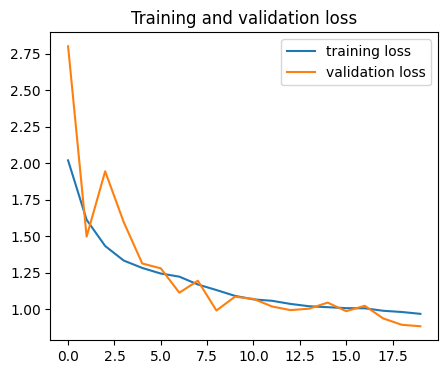

In [180]:
#Step: 3D

#Plot the training loss, validation loss vs number of epochs and
# training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

#plotting Training Loss and Validation Loss.

accuracy_4 = history_4.history['accuracy']
val_accuracy_4 = history_4.history['val_accuracy']
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

epochs = range(len(accuracy_4)) # Get number of epochs

plt.figure(figsize=(5,4))
plt.plot(epochs, loss_4, label = 'training loss')
plt.plot(epochs, val_loss_4, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')


In [ ]:
#Observation: From the above plot graph we observe that validation loss is constantly dipped to 0.88%
# which can be seen at the last epoch = 20. The validation loss had some fluctuations earlier between the
# epochs 2 to 4, however, after epoch = 5 the, validation loss constantly dipped and reduced significantly.
# It identifies that selecting the batch size of 16 worked in favour of training the model as if there
# would had been more sharp curves in the validation loss then the batch size needs to be reduced so as to control
# the fluctuations. However, there are less sharp curves so we come to conclusion that selecting the batch size 16
# worked fine for training the model with this Neural Network Architecture.

<Figure size 640x480 with 0 Axes>

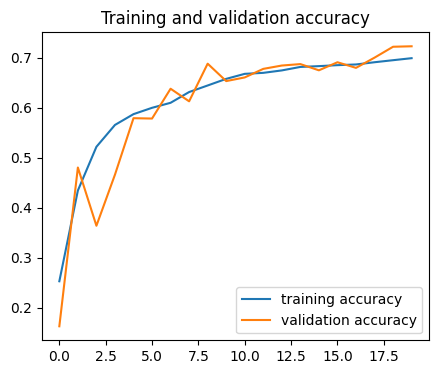

<Figure size 640x480 with 0 Axes>

In [181]:
#plotting training Accuracy and Validation Accuracy

plt.figure(figsize=(5,4))
plt.plot(epochs, accuracy_4, label = 'training accuracy')
plt.plot(epochs, val_accuracy_4, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

In [ ]:
#Observation: The validation accuracy achieved is 72.29% whereas
# the training accuracy achieved is 72.97%.
# From the above plot graph, we observe that the validation accuracy has constantly improved during
# the entire training period.
# Also, it is observed from the above plot graph that the training accuracy has also constantly improved
# during the entire training period which suggests that the Neural Network architecture performed better.